In [9]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Modeling imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score,log_loss, confusion_matrix, precision_score, recall_score, accuracy_score 
from sklearn import linear_model, ensemble , tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.linear_model import LogisticRegression
import imblearn.over_sampling
from sklearn.svm import SVC  
from sklearn.utils import class_weight
import statsmodels.api as sm
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline, make_pipeline 
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics


In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [73]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [10]:
df = pd.read_csv(r"C:\Users\anoop\Desktop\New folder\Westminster\AI and Machine learning\coursework\credit_train.csv")

In [11]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.shape

(100514, 19)

In [13]:
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [16]:
duplicate = df.duplicated()
print(f'Duplicate in df :', duplicate.sum())

Duplicate in df : 10728


In [17]:
#Replace the columns names for coding purpose
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['Loan_ID', 'Customer_ID', 'Loan_Status', 'Current_Loan_Amount', 'Term',
       'Credit_Score', 'Annual_Income', 'Years_in_current_job',
       'Home_Ownership', 'Purpose', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

# Split the data in train and test

In [18]:
df_train, df_test  = train_test_split(df, test_size=0.2, random_state=42)

In [19]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (80411, 19)
Shape of test: (20103, 19)


# Cleaning data

In [20]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
# dope nulls in Loan_ID
# for train
df_train = df_train.dropna(subset = ['Loan_ID'])
# for test
df_test = df_test.dropna(subset = ['Loan_ID'])

In [22]:
print(f'shape of train:',df_train.shape)
print(f'shape of test:',df_test.shape)


shape of train: (79992, 19)
shape of test: (20008, 19)


# check for dublicate

In [23]:
# for train
duplicate = df_train.duplicated()
print(f'Duplicate in train :', duplicate.sum())

# for test
duplicate = df_test.duplicated()
print(f'Duplicate in test :', duplicate.sum())
print(f'Shape of train:', df_train.shape)
print(f'Shape of test:', df_test.shape)

Duplicate in train : 6520
Duplicate in test : 401
Shape of train: (79992, 19)
Shape of test: (20008, 19)


# drop duplicates rows

In [24]:
# train
df_train.drop_duplicates(inplace=True)

# test
df_test.drop_duplicates(inplace=True)

# check for dublicate

In [25]:
# for train
duplicate = df_train.duplicated()
print(f'Duplicate in train :', duplicate.sum())

# for test
duplicate = df_test.duplicated()
print(f'Duplicate in test :', duplicate.sum())
print(f'Shape of train:', df_train.shape)
print(f'Shape of test:', df_test.shape)

Duplicate in train : 0
Duplicate in test : 0
Shape of train: (73472, 19)
Shape of test: (19607, 19)


# Duplicate in Loan ID

In [26]:
df_train['Loan_ID'].value_counts().sort_values(ascending=False)

1925360b-d8a1-4d38-8bd0-0e0cc829958a    2
c403f895-b223-4427-b9e1-beae62ead638    2
aaaf9d0b-6cde-459b-b562-2c5bef715e6e    2
7845c4c3-fbfb-4487-a9f4-acbe17ecd729    2
51986343-1800-466d-adf9-e89271b8caff    2
                                       ..
836ebadd-a88b-4a8f-a9e6-967572d1c7c4    1
b8c03fd0-2e63-41fc-837f-24d2aef31317    1
d9d91dd9-d73c-4bf0-a29c-418bcfeecb48    1
b0368b10-1e70-4b7e-b7d0-bfe8921ac3a7    1
3f33a89b-febb-48ef-adda-ac2e03267ba9    1
Name: Loan_ID, Length: 68478, dtype: int64

In [27]:
df_train[(df_train.Loan_ID.duplicated() & (df_train['Current_Loan_Amount'] == 99999999.0))]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
1131,f001953b-a5e1-4668-8fc1-d8df1a9e72c0,702e5fcc-00bf-4722-8f3e-9b16b211e8de,Fully Paid,99999999.0,Long Term,688.0,674975.0,5 years,Rent,Business Loan,5495.37,14.7,45.0,12.0,0.0,157453.0,415316.0,0.0,0.0
2357,d3de2f28-3759-4453-a2d4-dd0f0dfed25f,b3110f03-0c03-45f5-9ca6-e368a1d39f40,Fully Paid,99999999.0,Long Term,696.0,851846.0,9 years,Own Home,Debt Consolidation,10647.98,9.5,NaN,8.0,0.0,129219.0,487366.0,0.0,0.0
4416,15a35601-a5b8-4f53-aaeb-e89bd9838f9b,a147b553-a0f1-4773-910d-9b1af0052324,Fully Paid,99999999.0,Long Term,667.0,1412897.0,10+ years,Rent,Debt Consolidation,36970.58,22.7,60.0,12.0,0.0,315248.0,651816.0,0.0,0.0
4647,ea0e3c8d-0a6b-4b03-a766-c310c5a22cd6,e25e2a25-19db-4100-97fc-18282b8c98a0,Fully Paid,99999999.0,Short Term,721.0,805733.0,10+ years,Home Mortgage,Debt Consolidation,12757.55,15.9,45.0,9.0,0.0,93347.0,195448.0,0.0,0.0
4714,adebe0c9-c9d5-44fa-b70e-a827e2100415,2c2a199f-48b3-4b9b-91b4-e013dc45503c,Fully Paid,99999999.0,Long Term,678.0,1606279.0,< 1 year,Home Mortgage,Debt Consolidation,14858.00,29.5,23.0,20.0,1.0,203205.0,312884.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80151,cc537c28-c1ce-4b20-97fc-7947067688dd,e2293f56-2414-49dc-9bd7-5fbb2d64d385,Fully Paid,99999999.0,Long Term,722.0,1248186.0,8 years,Home Mortgage,Debt Consolidation,13729.97,17.5,NaN,8.0,0.0,526376.0,731698.0,0.0,0.0
80202,fc1deea3-945e-4ed4-acf7-71751b01797b,64577063-c0ec-4273-acab-e55105467aae,Fully Paid,99999999.0,Long Term,723.0,2412696.0,7 years,Home Mortgage,Debt Consolidation,12425.43,28.0,NaN,11.0,0.0,367897.0,777348.0,0.0,0.0
80244,35a73834-a7d1-47ae-9193-8f5da7f7f43b,a35a43a7-67dd-4989-a707-a389b6614beb,Fully Paid,99999999.0,Long Term,670.0,5225931.0,5 years,Rent,Debt Consolidation,18813.42,23.7,37.0,13.0,0.0,742596.0,1682692.0,0.0,0.0
80287,802d1d90-a269-4fdc-9697-1bec09c94128,a34e5841-7dad-4ec2-ac11-337cdc831782,Fully Paid,99999999.0,Short Term,683.0,843372.0,3 years,Home Mortgage,Debt Consolidation,13283.09,12.9,NaN,12.0,0.0,534508.0,724724.0,0.0,0.0


# drop duplicate in Loan_ID and Current_Loan_Amount = 99999999.0

In [28]:
# for train
df_train = df_train[~(df_train.Loan_ID.duplicated() & (df_train['Current_Loan_Amount'] == 99999999.0))]

# for test
df_test = df_test[~(df_test.Loan_ID.duplicated() & (df_test['Current_Loan_Amount'] == 99999999.0))]

In [29]:
df_train[(df_train.Loan_ID.duplicated())]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
616,ccb4bff4-4103-4220-bd6a-7cf8d97660f2,f7ad2ea9-c1a2-4020-8db9-d1ce98dd9cac,Fully Paid,215512.0,Short Term,716.0,1302868.0,7 years,Rent,Debt Consolidation,5830.34,13.8,NaN,6.0,0.0,84284.0,325270.0,0.0,0.0
625,cb1970cb-57d1-4d98-9889-c95b36e4c72a,9a4fded3-a8a1-42e2-b10e-31ce3925e444,Fully Paid,357808.0,Long Term,671.0,1158810.0,2 years,Home Mortgage,Debt Consolidation,29260.00,12.5,1.0,27.0,0.0,331759.0,1401994.0,0.0,0.0
981,6c36c90c-da96-42cf-b46d-81f50ec470f3,8a4d6d5b-69e0-4bde-afb2-cc1d3e8b831f,Fully Paid,456786.0,Long Term,700.0,1327606.0,1 year,Rent,Debt Consolidation,3186.30,15.2,51.0,5.0,0.0,105355.0,153626.0,0.0,0.0
1047,58d48443-93b1-4443-bd65-3ecd0fbbf9f7,d5d43933-bf2d-4b95-87e9-7b743568b618,Fully Paid,543290.0,Long Term,699.0,1370071.0,10+ years,Rent,Debt Consolidation,11017.72,14.1,NaN,8.0,0.0,340404.0,532620.0,0.0,0.0
1846,02287061-2f82-4870-a84f-7895ae1ad907,2a74c9b8-d631-46b4-aa2d-7b8b8b668034,Fully Paid,324148.0,Short Term,NaN,NaN,2 years,Own Home,Debt Consolidation,16480.98,5.7,NaN,14.0,0.0,22819.0,911284.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80372,abfdae7a-3bda-42db-ba79-4b9c059764bb,0a6c36c7-001d-4d98-9f35-26e0365228fa,Fully Paid,429088.0,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,27129.34,12.3,NaN,13.0,0.0,351329.0,605352.0,0.0,0.0
80376,f35b054f-30c1-4e13-af01-685db773770f,3a42402c-3996-4021-a935-185eb1754fb1,Fully Paid,207086.0,Short Term,723.0,1645457.0,10+ years,Rent,other,34143.00,19.8,10.0,11.0,0.0,232218.0,321244.0,0.0,0.0
80378,47f27c67-3199-4aa4-a700-826e4a4b922c,d2b60744-df1a-4e25-a2f0-5ae12e6d31aa,Fully Paid,546260.0,Long Term,725.0,1698372.0,10+ years,Rent,Debt Consolidation,21512.75,17.5,12.0,19.0,0.0,88787.0,1606352.0,0.0,0.0
80389,5f51b043-e1cb-4022-8085-1aed0142d5f0,8a187950-2cc1-470b-852e-d32e13cb49af,Fully Paid,99242.0,Short Term,703.0,666596.0,3 years,Own Home,Debt Consolidation,9110.12,9.1,18.0,9.0,0.0,126882.0,282546.0,0.0,0.0


# drop nulls in Loan_Status

In [30]:
# for train
df_train = df_train.dropna(subset = ['Annual_Income'])

# for test
df_test = df_test.dropna(subset = ['Annual_Income'])

In [31]:
#df_train
df_train.Purpose.unique()

#da_test
df_test.Purpose.unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy a Car', 'other',
       'small_business', 'Other', 'Business Loan', 'Buy House',
       'Medical Bills', 'moving', 'Take a Trip', 'wedding',
       'major_purchase', 'Educational Expenses', 'vacation',
       'renewable_energy'], dtype=object)

In [32]:
df_train.Purpose = df_train.Purpose.str.replace('other','Other')
df_test.Purpose = df_test.Purpose.str.replace('other','Other')


In [33]:
df_train.Purpose.value_counts()

Debt Consolidation      44775
Other                    5182
Home Improvements        3373
Business Loan             867
Buy a Car                 741
Medical Bills             626
Buy House                 381
Take a Trip               307
major_purchase            209
small_business            160
moving                     82
wedding                    66
Educational Expenses       56
vacation                   47
renewable_energy            6
Name: Purpose, dtype: int64

In [34]:
# dope duplicated in Loan_ID

# for train
df_train = df_train.drop_duplicates(subset = ['Loan_ID'])

# for test
df_test = df_test.drop_duplicates(subset = ['Loan_ID'])

In [35]:
df_train.isnull().sum() # train

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                        0
Annual_Income                       0
Years_in_current_job             2368
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    29853
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      109
Tax_Liens                           3
dtype: int64

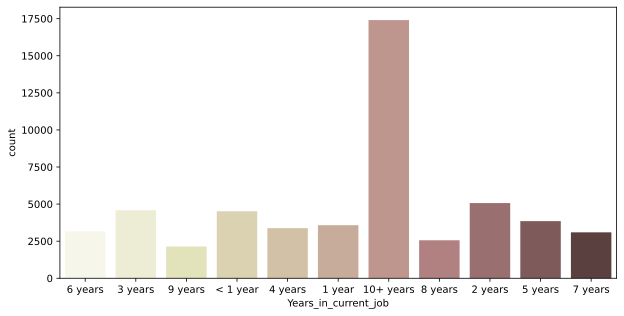

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(df_train['Years_in_current_job'], palette='pink_r');

## fill nulls in Years_in_current_job 

In [37]:
# for train
df_train['Years_in_current_job'] = df_train['Years_in_current_job'].fillna('10+ years')

# for test
df_test['Years_in_current_job'] = df_test['Years_in_current_job'].fillna('10+ years')

In [38]:
df_train.isnull().sum()

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                        0
Annual_Income                       0
Years_in_current_job                0
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    29853
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      109
Tax_Liens                           3
dtype: int64

## drop nulls 

In [39]:
# for train
df_train = df_train.dropna()

# for test
df_test = df_test.dropna()

In [40]:
df_train.isna().sum()

Loan_ID                         0
Customer_ID                     0
Loan_Status                     0
Current_Loan_Amount             0
Term                            0
Credit_Score                    0
Annual_Income                   0
Years_in_current_job            0
Home_Ownership                  0
Purpose                         0
Monthly_Debt                    0
Years_of_Credit_History         0
Months_since_last_delinquent    0
Number_of_Open_Accounts         0
Number_of_Credit_Problems       0
Current_Credit_Balance          0
Maximum_Open_Credit             0
Bankruptcies                    0
Tax_Liens                       0
dtype: int64

# Get Dummies

In [41]:
# train
bank_loan_train = pd.get_dummies(df_train, columns =['Term','Home_Ownership','Purpose','Loan_Status', 'Years_in_current_job'], drop_first=True) ###

# test
bank_loan_test = pd.get_dummies(df_test, columns =['Term','Home_Ownership','Purpose','Loan_Status' , 'Years_in_current_job'], drop_first=True) ###

In [42]:
bank_loan_train.columns

Index(['Loan_ID', 'Customer_ID', 'Current_Loan_Amount', 'Credit_Score',
       'Annual_Income', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens', 'Term_Short Term',
       'Home_Ownership_Home Mortgage', 'Home_Ownership_Own Home',
       'Home_Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Educational Expenses',
       'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other',
       'Purpose_Take a Trip', 'Purpose_major_purchase', 'Purpose_moving',
       'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding', 'Loan_Status_Fully Paid',
       'Years_in_current_job_10+ years', 'Years_in_current_job_2 years',
       'Years_in_current_job_3 years', 'Years_in_current_job_4 years',
       'Years_in_cu

In [43]:
df_train.corr()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
Current_Loan_Amount,1.000000,-0.098864,0.020201,0.003324,0.022658,0.007949,0.006066,-0.002421,0.007643,-0.001562,-0.004085,-0.002273
Credit_Score,-0.098864,1.000000,-0.020251,0.010889,-0.009961,-0.008540,0.008718,0.002650,0.000826,-0.003733,-0.004011,0.012378
Annual_Income,0.020201,-0.020251,1.000000,0.550424,0.148713,-0.076968,0.137938,-0.015624,0.348048,0.042298,-0.062764,0.061373
Monthly_Debt,0.003324,0.010889,0.550424,1.000000,0.156601,-0.058968,0.376670,-0.045047,0.437210,0.035494,-0.074926,0.030177
Years_of_Credit_History,0.022658,-0.009961,0.148713,0.156601,1.000000,-0.040315,0.093666,0.023121,0.192061,0.026587,0.022964,0.008077
Months_since_last_delinquent,0.007949,-0.008540,-0.076968,-0.058968,-0.040315,1.000000,-0.037129,0.100277,-0.024462,-0.005491,0.120699,0.009557
Number_of_Open_Accounts,0.006066,0.008718,0.137938,0.376670,0.093666,-0.037129,1.000000,-0.018084,0.226597,0.028409,-0.028776,0.002342
Number_of_Credit_Problems,-0.002421,0.002650,-0.015624,-0.045047,0.023121,0.100277,-0.018084,1.000000,-0.103629,-0.009802,0.700255,0.612679
Current_Credit_Balance,0.007643,0.000826,0.348048,0.437210,0.192061,-0.024462,0.226597,-0.103629,1.000000,0.142361,-0.120289,-0.009013
Maximum_Open_Credit,-0.001562,-0.003733,0.042298,0.035494,0.026587,-0.005491,0.028409,-0.009802,0.142361,1.000000,-0.015570,-0.001976


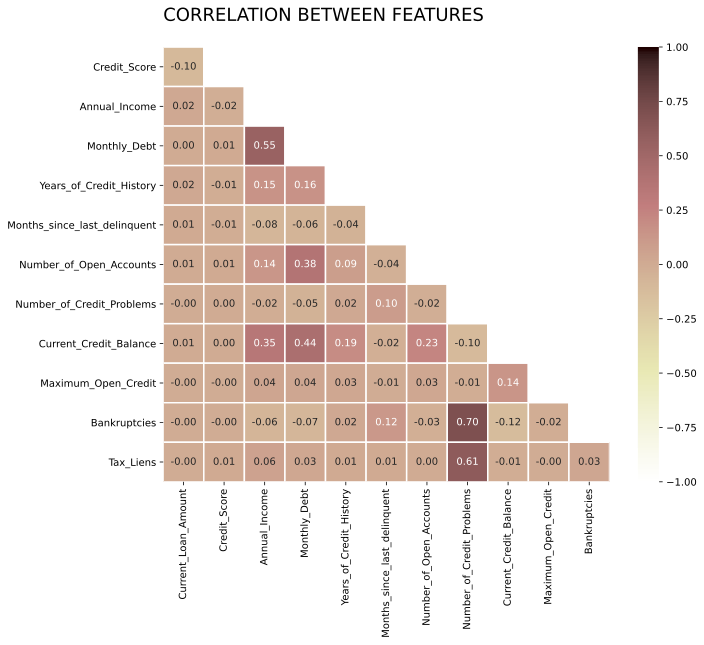

In [44]:
plt.figure(figsize=(10,8))
data_corr = df_train.corr()
mask = np.triu(np.ones_like(data_corr,dtype=np.bool))
mask = mask[1:,:-1]
corr = data_corr.iloc[1:,:-1].copy()
sns.heatmap(corr, cmap = 'pink_r', annot = True, vmin= -1, vmax= 1, linewidths=1.5, fmt='.2f', mask=mask);
plt.title('CORRELATION BETWEEN FEATURES\n', loc='left', fontsize=18);

# Visualizing data

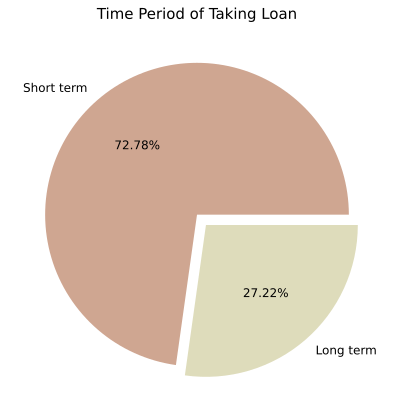

In [45]:
c = ['#724949','#cfa691', '#120f0f', '#a06868'] # colors
plt.figure(figsize=(7,7))
plt.pie(x = bank_loan_train['Term_Short Term'].value_counts(),
        labels=['Short term','Long term'],autopct='%.2f%%',
        textprops={'fontsize': 12},explode=[0,0.09], colors = ['#cfa691','#DEDCBB'])
plt.title('Time Period of Taking Loan',fontdict={'fontsize':15});

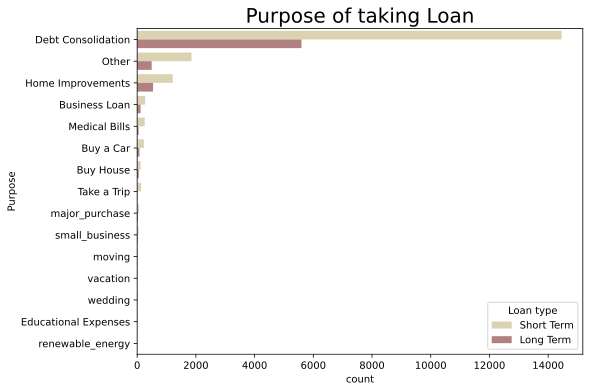

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(y='Purpose' , data=df_train, order = df_train['Purpose'].value_counts().index,
              hue='Term', palette = 'pink_r')
plt.title('Purpose of taking Loan' , fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="lower right");

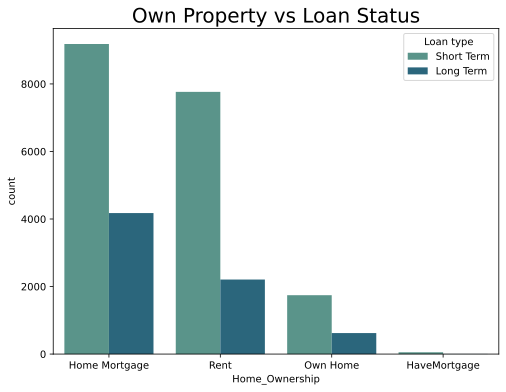

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(x='Home_Ownership',data=df_train ,order = df_train['Home_Ownership'].value_counts().index
              ,hue='Term',  palette = 'crest')
plt.title('Own Property vs Loan Status',fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="upper right", labels=["Short Term","Long Term"]);

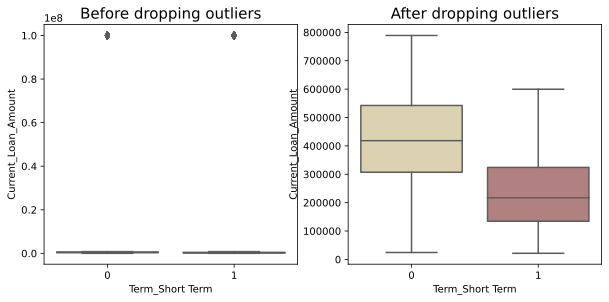

In [48]:
plt.figure(figsize = [10,15])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Current_Loan_Amount',
            palette='pink_r', data=bank_loan_train.sort_values('Current_Loan_Amount',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 )

bank_loan_train = bank_loan_train[bank_loan_train['Current_Loan_Amount'] != 99999999]
bank_loan_train = bank_loan_train[((bank_loan_train['Current_Loan_Amount'] <= 600000 )
                                   & (bank_loan_train['Term_Short Term']==1))
                                  | (bank_loan_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Current_Loan_Amount',
            palette='pink_r', data=bank_loan_train.sort_values('Current_Loan_Amount',ascending=False));
plt.title('After dropping outliers',fontsize = 15 );

In [49]:
bank_loan_test = bank_loan_test[bank_loan_test['Current_Loan_Amount'] != 99999999]
bank_loan_test = bank_loan_test[((bank_loan_test['Current_Loan_Amount'] <= 600000 )
                                   & (bank_loan_test['Term_Short Term']==1))
                                  | (bank_loan_test['Term_Short Term']==0)]


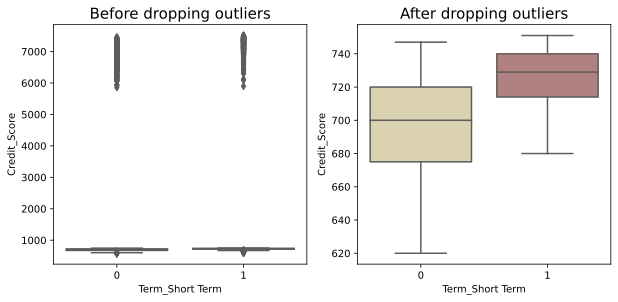

In [50]:
plt.figure(figsize = [10,15])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Credit_Score',
            palette='pink_r', data = bank_loan_train.sort_values('Credit_Score',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 )

bank_loan_train = bank_loan_train.loc[bank_loan_train['Credit_Score'] <= 1500,:]
bank_loan_train = bank_loan_train.loc[bank_loan_train['Credit_Score'] >= 620 ,:]
bank_loan_train = bank_loan_train[((bank_loan_train['Credit_Score'] >= 680 )
                                   & (bank_loan_train['Term_Short Term']==1))| 
                                  (bank_loan_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Credit_Score',
            palette='pink_r', data = bank_loan_train.sort_values('Credit_Score',ascending=False));
plt.title('After dropping outliers',fontsize = 15 );


# plot the correlation after one hot coding

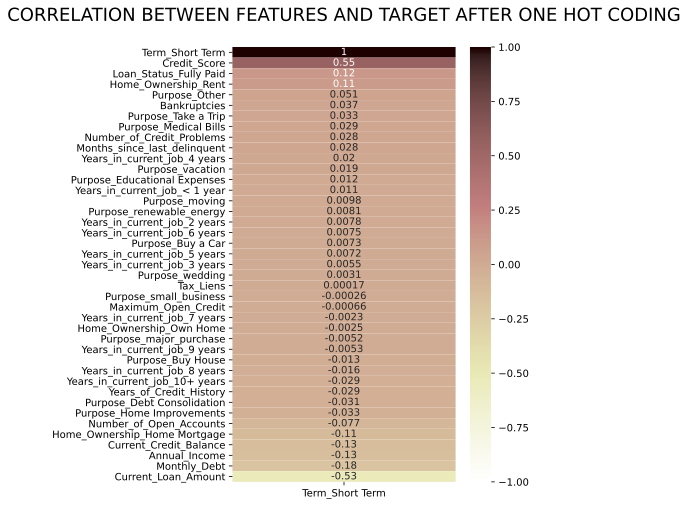

In [51]:
plt.figure(figsize=(5, 8))
heatmap = sns.heatmap(bank_loan_train.corr()[
    ['Term_Short Term']].sort_values(by='Term_Short Term',ascending=False),
                      vmin=-1, vmax=1, annot=True,
                      cmap = 'pink_r')
plt.title('CORRELATION BETWEEN FEATURES AND TARGET AFTER ONE HOT CODING\n', loc='center', fontsize=18);

In [52]:
X_train = bank_loan_train[['Current_Loan_Amount','Annual_Income','Monthly_Debt',
                          'Current_Credit_Balance', 'Tax_Liens', 
                          'Home_Ownership_Home Mortgage', 'Loan_Status_Fully Paid',
                          'Purpose_Buy House', 'Years_in_current_job_10+ years']]
y_train = bank_loan_train['Term_Short Term']
X_test = bank_loan_test[['Current_Loan_Amount','Annual_Income','Monthly_Debt',
                          'Current_Credit_Balance', 'Tax_Liens',
                          'Home_Ownership_Home Mortgage', 'Loan_Status_Fully Paid',
                          'Purpose_Buy House', 'Years_in_current_job_10+ years']]
y_test = bank_loan_test['Term_Short Term']


# KNN Model

In [46]:
knn = KNeighborsClassifier(n_neighbors= 9)
k_range = list(range(3,11))
param_grd = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grd, scoring='f1', cv = 5)
grid.fit(X_train, y_train)
print('Best estimator: ', grid.best_estimator_ )
print('Best f1_score for cross validation: ',grid.best_score_ )

Best estimator:  KNeighborsClassifier(n_neighbors=9)
Best f1_score for cross validation:  0.8394684049860744


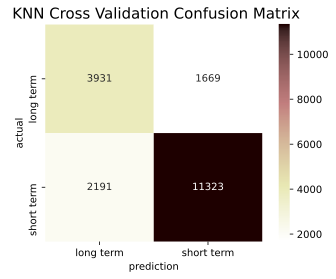

In [47]:
y_predict = (grid.predict_proba(X_train)[:, 1] >= 0.624)

loan_confusion = confusion_matrix(y_train, y_predict)

sns.heatmap(loan_confusion , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title(' KNN Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');Please

## Testing data

In [48]:
knn = KNeighborsClassifier(n_neighbors= 9)
k_range = list(range(3,11))
param_grd = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grd, scoring='f1', cv = 5)
grid.fit(X_test, y_test)
print('Best estimator: ', grid.best_estimator_ )
print('Best f1_score for cross validation: ',grid.best_score_ )

Best estimator:  KNeighborsClassifier(n_neighbors=9)
Best f1_score for cross validation:  0.829586710997256


# Decision tree classifer

In [49]:
# normal
Decision_Tree = DecisionTreeClassifier(max_depth = 8)
Decision_Tree.fit(X_train, y_train)
scores = cross_val_score(Decision_Tree, X_train, y_train, cv=5, scoring='f1')
print('Normal Decision Tree Valdition F1:',scores.mean())


# balenced
dt_bal = DecisionTreeClassifier(max_depth = 8, class_weight='balanced')
dt_bal.fit(X_train, y_train)
scores = cross_val_score(dt_bal, X_train, y_train, cv=5, scoring='f1')
print('Balanced class weights Decision Tree Valdition F1:',scores.mean())


# weighted
dt_wtd = DecisionTreeClassifier(class_weight= {0 : 10, 1 : 1})
scores = cross_val_score(dt_wtd, X_train, y_train, cv=5, scoring='f1')
dt_wtd.fit(X_train, y_train)
print('10:1 class weights Decision Tree Valdition F1:',scores.mean())

#gridsearch

tree_param = {'criterion':['gini','entropy'],
              'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

gd_sr = GridSearchCV(DecisionTreeClassifier(), param_grid=tree_param,scoring='f1',cv=5,n_jobs=-1)
gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best_params_
print('\n Best param after grid search', best_parameters)
print('\n Best score after grid search', gd_sr.best_score_)


Normal Decision Tree Valdition F1: 0.8476345669023256
Balanced class weights Decision Tree Valdition F1: 0.7829681517505787
10:1 class weights Decision Tree Valdition F1: 0.8062600518242332

 Best param after grid search {'criterion': 'entropy', 'max_depth': 4}

 Best score after grid search 0.8599808971010641


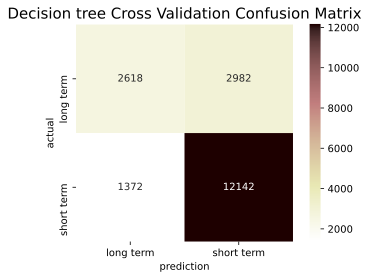

In [50]:
# confusion matrix for crossval
y_pred = cross_val_predict(Decision_Tree, X = X_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Decision tree Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

# Testing data


# Random forest classifer

In [51]:
# normal
Random_Forest = RandomForestClassifier(n_estimators = 5, random_state=1)
Random_Forest.fit(X_train, y_train)
scores = cross_val_score(Random_Forest, X_train, y_train, cv=10, scoring='f1')
print('\n Normal Random Forest Valdition F1: \n',scores)
print('\n Mean Normal Random Forest Valdition F1:  \n',scores.mean())

# balenced
rf_bal = RandomForestClassifier(n_estimators = 10, random_state=1, class_weight='balanced')
rf_bal.fit(X_train, y_train)
scores = cross_val_score(rf_bal, X_train, y_train, cv=10, scoring='f1')
print('\n Balanced class weights Random Forest Valdition F1: \n',scores)
print('\n Mean Balanced class weights Random Forest Valdition F1: \n',scores.mean())

# weighted
rf_wtd = RandomForestClassifier(n_estimators = 10, random_state=1, class_weight= {0 : 2, 1 : 1})
rf_wtd.fit(X_train, y_train)
scores = cross_val_score(rf_wtd, X_train, y_train, cv=10, scoring='f1')
print('\n 2:1 class weights Random Forest Valdition F1:\n',scores)
print('\n 2:1 class weights Random Forest Valdition F1: \n',scores.mean())




 Normal Random Forest Valdition F1: 
 [0.83502171 0.83172562 0.82961898 0.84071429 0.82319049 0.82530554
 0.83100108 0.8275357  0.82428571 0.83780881]

 Mean Normal Random Forest Valdition F1:  
 0.8306207917405543

 Balanced class weights Random Forest Valdition F1: 
 [0.83164006 0.83637666 0.82323232 0.83555236 0.83604777 0.83798478
 0.82660851 0.83162518 0.82735918 0.83424408]

 Mean Balanced class weights Random Forest Valdition F1: 
 0.8320670895274894

 2:1 class weights Random Forest Valdition F1:
 [0.83002208 0.8341637  0.82909091 0.83821933 0.83393764 0.83737776
 0.82404372 0.82840237 0.82597592 0.83082569]

 2:1 class weights Random Forest Valdition F1: 
 0.8312059101661967


In [52]:
# normal
Random_Forest = RandomForestClassifier(n_estimators = 5, random_state=1)
Random_Forest.fit(X_test, y_test)
scores = cross_val_score(Random_Forest, X_test, y_test, cv=10, scoring='f1')
print('\n Normal Random Forest Valdition F1: \n',scores)
print('\n Mean Normal Random Forest Valdition F1:  \n',scores.mean())

# balenced
rf_bal = RandomForestClassifier(n_estimators = 10, random_state=1, class_weight='balanced')
rf_bal.fit(X_test, y_test)
scores = cross_val_score(rf_bal, X_test, y_test, cv=10, scoring='f1')
print('\n Balanced class weights Random Forest Valdition F1: \n',scores)
print('\n Mean Balanced class weights Random Forest Valdition F1: \n',scores.mean())

# weighted
rf_wtd = RandomForestClassifier(n_estimators = 10, random_state=1, class_weight= {0 : 2, 1 : 1})
rf_wtd.fit(X_test, y_test)
scores = cross_val_score(rf_wtd, X_test, y_test, cv=10, scoring='f1')
print('\n 2:1 class weights Random Forest Valdition F1:\n',scores)
print('\n 2:1 class weights Random Forest Valdition F1: \n',scores.mean())




 Normal Random Forest Valdition F1: 
 [0.82232346 0.79682179 0.83108108 0.80225989 0.84342857 0.81641961
 0.83179724 0.83333333 0.80821918 0.82406356]

 Mean Normal Random Forest Valdition F1:  
 0.8209747718231398

 Balanced class weights Random Forest Valdition F1: 
 [0.82312925 0.79577465 0.83564815 0.81169591 0.82063306 0.81755196
 0.82021152 0.83737024 0.81955763 0.82593857]

 Mean Balanced class weights Random Forest Valdition F1: 
 0.8207510926783022

 2:1 class weights Random Forest Valdition F1:
 [0.83410138 0.7957993  0.82814302 0.81986143 0.83062645 0.82694541
 0.81967213 0.83967705 0.81213536 0.80275229]

 2:1 class weights Random Forest Valdition F1: 
 0.8209713826492063


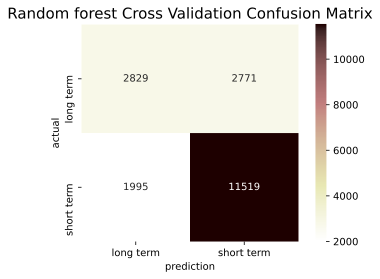

In [53]:
# confusion matrix for crossval
y_pred = cross_val_predict(Random_Forest, X = X_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Random forest Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

# Bagging

In [54]:
bag_clf = BaggingClassifier(
    RandomForestClassifier(), n_estimators=50,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

accuracies = cross_val_score(estimator = bag_clf, X = X_train, y = y_train, cv = 5, scoring='f1')
print('f1_score Bagging for cross validation : ',accuracies)
print('Mean f1_score Bagging for cross validation : ',accuracies.mean())

f1_score Bagging for cross validation :  [0.85568587 0.85791519 0.85103495 0.85175017 0.85284454]
Mean f1_score Bagging for cross validation :  0.8538461459334453


In [55]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=50,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

accuracies = cross_val_score(estimator = bag_clf, X = X_train, y = y_train, cv = 5, scoring='f1')
print('f1_score Bagging for cross validation : ',accuracies)
print('Mean f1_score Bagging for cross validation : ',accuracies.mean())


f1_score Bagging for cross validation :  [0.84661495 0.85128744 0.84592358 0.85228667 0.84035119]
Mean f1_score Bagging for cross validation :  0.8472927653306987


In [56]:
bag_clf = BaggingClassifier(
    KNeighborsClassifier(), n_estimators=50,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

accuracies = cross_val_score(estimator = bag_clf, X = X_train, y = y_train, cv = 5, scoring='f1')
print('f1_score Bagging for cross validation : ',accuracies)
print('Mean f1_score Bagging for cross validation : ',accuracies.mean())


f1_score Bagging for cross validation :  [0.84931062 0.84661157 0.84926043 0.8522054  0.85019455]
Mean f1_score Bagging for cross validation :  0.8495165148687359


  ## Testing data

In [57]:
bag_clf = BaggingClassifier(
    RandomForestClassifier(), n_estimators=50,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_test, y_test)

accuracies = cross_val_score(estimator = bag_clf, X = X_test, y = y_test, cv = 5, scoring='f1')
print('f1_score Bagging for cross validation : ',accuracies)
print('Mean f1_score Bagging for cross validation : ',accuracies.mean())


f1_score Bagging for cross validation :  [0.83278328 0.84561592 0.85572139 0.85395764 0.84391819]
Mean f1_score Bagging for cross validation :  0.8463992844143732


In [58]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=50,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_test, y_test)

accuracies = cross_val_score(estimator = bag_clf, X = X_test, y = y_test, cv = 5, scoring='f1')
print('f1_score Bagging for cross validation : ',accuracies)
print('Mean f1_score Bagging for cross validation : ',accuracies.mean())


f1_score Bagging for cross validation :  [0.83699944 0.84874864 0.83881952 0.84168565 0.84046693]
Mean f1_score Bagging for cross validation :  0.841344034870378


In [59]:
bag_clf = BaggingClassifier(
    KNeighborsClassifier(), n_estimators=50,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_test, y_test)

accuracies = cross_val_score(estimator = bag_clf, X = X_test, y = y_test, cv = 5, scoring='f1')
print('f1_score Bagging for cross validation : ',accuracies)
print('Mean f1_score Bagging for cross validation : ',accuracies.mean())


f1_score Bagging for cross validation :  [0.83609959 0.83782356 0.85669291 0.84909671 0.84619423]
Mean f1_score Bagging for cross validation :  0.8451813980576318


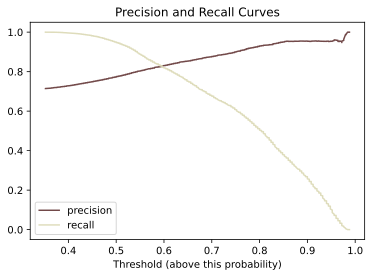

In [60]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_train, bag_clf.predict_proba(X_train)[:,1] )
plt.plot(threshold_curve, precision_curve[1:],label='precision', color = '#724949')
plt.plot(threshold_curve, recall_curve[1:], label='recall', color = '#DEDCBB')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability)');
plt.title('Precision and Recall Curves');

In [61]:
y_predict = (bag_clf.predict_proba(X_train)[:, 1] >= 0.1)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_predict), 
                                                     recall_score(y_train, y_predict)))

Default threshold:
Precision: 0.7070,   Recall: 1.0000


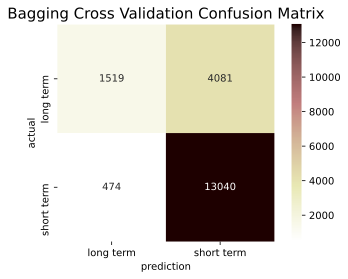

In [62]:
# confusion matrix for crossval
y_pred = cross_val_predict(bag_clf, X = X_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('Bagging Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

# Boosting

In [54]:
param_grid = {'base_estimator__criterion' : ['gini', 'entropy'],
              'base_estimator__splitter' :   ['best', 'random'],
              'n_estimators': [1, 5, 10, 20, 100, 500]
             }
DTC = DecisionTreeClassifier(random_state = 0)
ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'f1')
grid_search_ABC.fit(X_train, y_train)

print('\n Best param after grid search', grid_search_ABC.best_params_)
print('\n Best score after grid search', grid_search_ABC.best_score_)



 Best param after grid search {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'n_estimators': 10}

 Best score after grid search 0.801009751696111


In [55]:
param_grid = {'base_estimator__criterion' : ['gini', 'entropy'],
              'base_estimator__splitter' :   ['best', 'random'],
              'n_estimators': [1, 5, 10, 20, 100, 500]
             }
DTC = DecisionTreeClassifier(random_state = 0)
ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'f1')
grid_search_ABC.fit(X_test, y_test)

print('\n Best param after grid search', grid_search_ABC.best_params_)
print('\n Best score after grid search', grid_search_ABC.best_score_)



 Best param after grid search {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'n_estimators': 5}

 Best score after grid search 0.8027342057220028


In [56]:
y_predict = (grid_search_ABC.predict_proba(X_train)[:, 1] >= 0.1)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train, y_predict), 
                                                     recall_score(y_train, y_predict)))

Default threshold:
Precision: 0.8224,   Recall: 0.8064


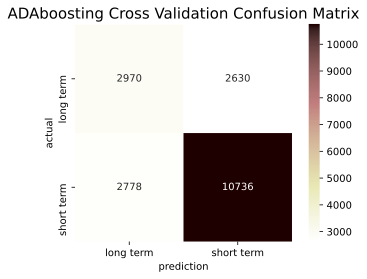

In [53]:
# confusion matrix for crossval
y_pred = cross_val_predict(grid_search_ABC, X = X_train, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['long term','short term'],
           yticklabels = ['long term','short term'])
plt.title('ADAboosting Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');